<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Douglas Fabian Paris Merin & Noe Alejando Salinas Gandara.

**Fecha:** 03 de marzo del 2020.

**Expediente** : 714977 & 714748.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase10 Metodo Aceptacion Rechazo

## Resolver los siguientes problemas:

Link del repo:
https://github.com/Noesns/Tarea_6


### Ejercicio 1: 
>Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.


#### Código de solución 
Para facilitar la demostracion, pasare diviendo el $P_{(k)}$ de forma que nos queda 


\begin{equation*}
\begin{aligned}
\frac{P_{k+1}}{P_{k}} &= \frac{\lambda}{k+1} \\
\newline
P_{k+1} &= \frac{\lambda^{k+1} ~ e^{-\lambda}}{k+1!}\\
\newline
P_k &= \frac{\lambda^k e^{-\lambda}}{k!}\\
\newline
\frac{P_{k+1}}{P_k} &= \frac{\frac{e^{-\lambda}\lambda^{k+1}}{k+1!}}{\frac{e^{-\lambda}\lambda^k}{k!}}\\
\newline
&= \frac{k!~\underline{e^{-\lambda}}{\lambda^{k}+1}}{k+1!~\underline{e^{-\lambda}}\lambda^k}\\
\newline
&= \frac{k!~\underline{\lambda^{k+1}}}{k+1!~\underline{\lambda^k}}\\
\newline
&= \frac{k!~\lambda}{k+1!}\\
\newline
&= \frac{\underline{k!}~\lambda}{(k+1) \underline{k!}}\\
\newline
&= \frac{~\lambda}{(k+1)} = \frac{P_{k+1}}{P_{k}}
\end{aligned}
\end{equation*}

In [4]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'= True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()
    
# Función que calcula la probabilidad acumulada optimizada
def P_acum_posson_o(k,lamb):
    Pr = np.zeros(k)
    Pr[0] = np.exp(-lamb)
    def pr(i):
        nonlocal Pr
        c  = lamb/(i+1)
        Pr[i+1]=c*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)


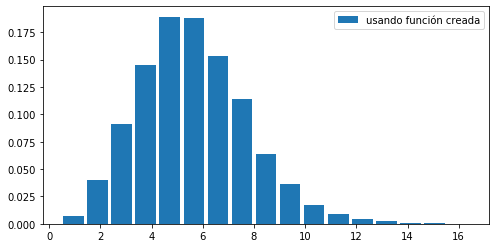

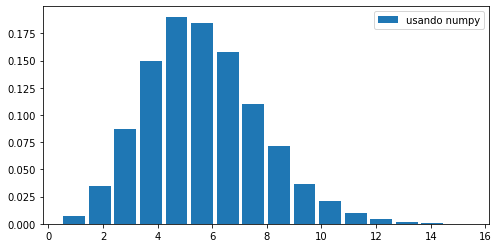

In [2]:
# def D_binomial_intermedia(n,p,N):
k = 10000; lamb = 5; N = 10**4

p_acum = P_acum_posson_o(k,lamb)
u = np.random.rand(N)

# Usando el método de la ecuacion recursiva
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.poisson(lamb,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

## Ejercicio 2
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.
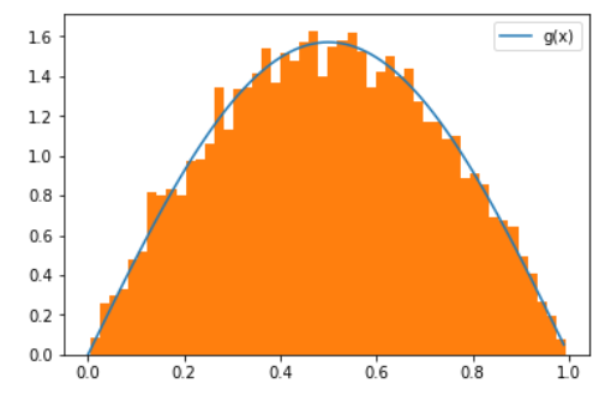

La funcion que vamos a usar es $t(x) = a sin(\pi x)$, por lo que tenemos que $\int_{0}^{1} t(x) dx = \int_{0}^{1} a sin (\pi x) $, y despues de realizar esa integral nos da como resultado $\frac{2a}{\pi}$, por lo que para formar la funcion $g(x)$ tenemos que sustituir de la siguiente forma $g(x) = \frac{a sin(\pi x)}{\frac{2a}{\pi}}$ y simplificando $g(x) = \frac{\pi sin(\pi x)}{2}$.

Para generar nuestra distribucion de probabilidad con la funcion $g(x)$ lo tenemos que sacar por el metodo de la transformada inversa, por lo que primero hay que determinar $G(x)$ para poder sacar la funcion inversa y $G(x)$  se determina integrando nuestra $\int g(x) dx = \int \frac{\pi sin(\pi x)}{2} = \frac{-cos(\pi x)}{2}$

Ahora aplicamos el metodo de la transformada inversa, en donde: 

\begin{equation*}
\begin{aligned}
\int g(x) dx = \int_{0}^{x} \frac{\pi sin(\pi x)}{2} = \frac{-cos(\pi x)}{2} + \frac{1}{2}\\
\frac{-cos(\pi x)}{2} + \frac{1}{2} &= U \\
\newline
& cos(\pi x) = -2 U + 1\\
\newline
& cos^{-1}(cos(\pi x)) = cos^{-1}( 1 -2 U)\\
\newline
& \pi x = cos^{-1}(1 -2 U)\\
\newline
& x = \frac{cos^{-1}(1 -2 U)}{\pi}
\end{aligned}
\end{equation*}

Y ya con esta ec $\frac{cos^{-1}(1 -2 U)}{\pi}$ podemos generar las variables aleatorias que esten distribuidas en como $g(x)$

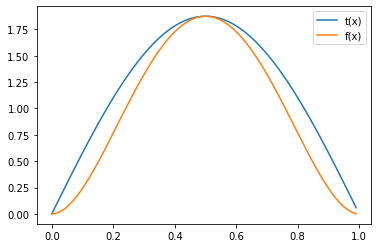

In [68]:
N=500
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.sin(x*np.pi) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,t(x),label = 't(x)')
plt.plot(x,f(x),label = 'f(x)')
plt.legend()
plt.show()

Si se cumple la condicion. $t(x)\geq f(x)$.

In [14]:
# Importamos las librerías principales
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# Creamos la función que crea muestras distribuidas exponencialmente
def D_sin(N):
    u = np.random.rand(N)
    return (np.arccos(1-2*u) / np.pi)

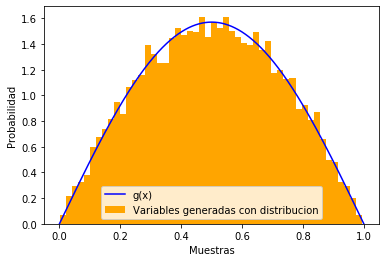

array([0.48347533, 0.67252816, 0.51595427, ..., 0.22586496, 0.75926226,
       0.40986419])

In [15]:
N = 10**4
a = 1
x = np.arange(0,1,(1/N))
y2 = (np.pi * np.sin(np.pi * x))/2
plt.plot(x,y2,'b',label = 'g(x)')
# Creo variables aleatorias y obtengo su histograma en la misma gráfica anterior
r2 = D_sin(N)
plt.hist(r2,bins = 50, density=True,color = 'orange',label='Variables generadas con distribucion')
plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend(loc = 'best')
plt.show()


Como se puede ver, las variables aleatorias si fueron generadas con la distribucion $g(x)$

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

In [59]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    aciertos = 0
    fallos = 0
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    aciertos = [1 if condition[i] else 0 \
         for i in range(len(R1))]
                
    plt.show()
    return(np.sum(aciertos))


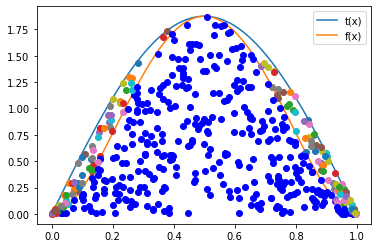

353

In [64]:
N=500
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.sin(x*np.pi) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,t(x),label = 't(x)')
plt.plot(x,f(x),label = 'f(x)')
plt.legend()
Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

El máximo de f es: [1.875]


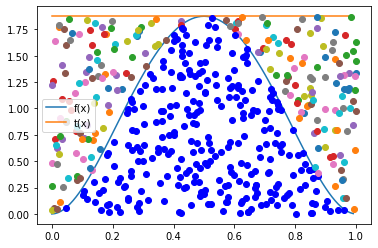

281

In [66]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc  = 'best')

# Validación del método

# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

Despues de hacer la comparacion el numero de aciertos en la **forma acotada con la funcion $sen(x)$ es de 353**, mientras que si $t(x)$ es **constante, tuvo un total de 251 de aciertos**, lo que nos quiere decir que hay una diferencia de 102 aciertos, y traducido a porcentaje el algoritmo que usa la funcion acotada es un $40\%$ mejor respecto a la funcion de constante. Como conclusion es mucho mejor acotar la funcion ya que el algoritmo es mas eficiente.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [2]:
import 
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo_mod(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    aciertos = 0
    fallos = 0
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    p1 = [R1[i] if condition[i] else 0 for i in range(len(R1))]
    p2 = [R2[i]*t_x[i] if condition[i] else 0 for i in range(len(R1))]
    aciertos = [1 if condition[i] else 0 \
         for i in range(len(R1))]
                
    plt.show()
    return(np.sum(aciertos),p1,p2)


El máximo de f es: [2.109375]


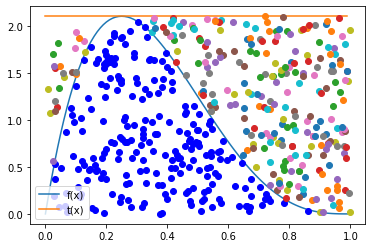

In [42]:
N =500
# Función objetivo 
f = lambda x:(20*x*((1-x)**3))
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc  = 'best')

# Validación del método

# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

y = Acep_rechazo_mod(R2,R1,f,t)

Aqui solo se cambio la f(x) por una nueva, y se aplico todo lo visto en clase.

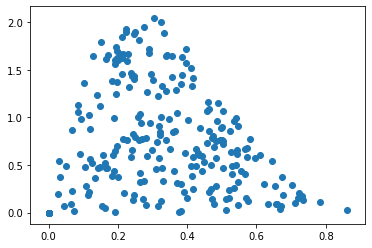

In [43]:
#plt.hist(y[2],bins = 20, density=True)
plt.scatter(y[1],y[2])

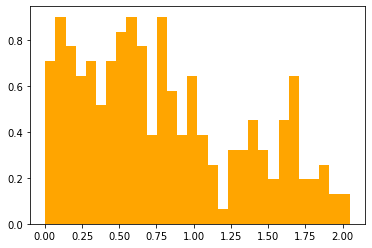

In [48]:
y[2]
graph = [y[2][i] for i in range(len(y[2])) if y[2][i]>0]
plt.hist(graph,bins = 30, density=True,color = 'orange',label='Variables generadas con distribucion')
plt.show()

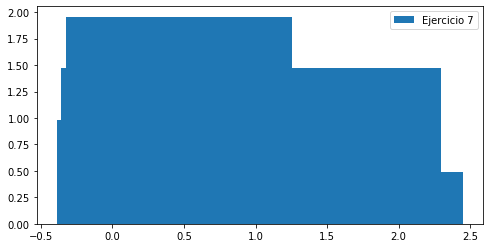

In [52]:
plot_histogram_discrete(graph,"Ejercicio 7")